TASK **1**

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

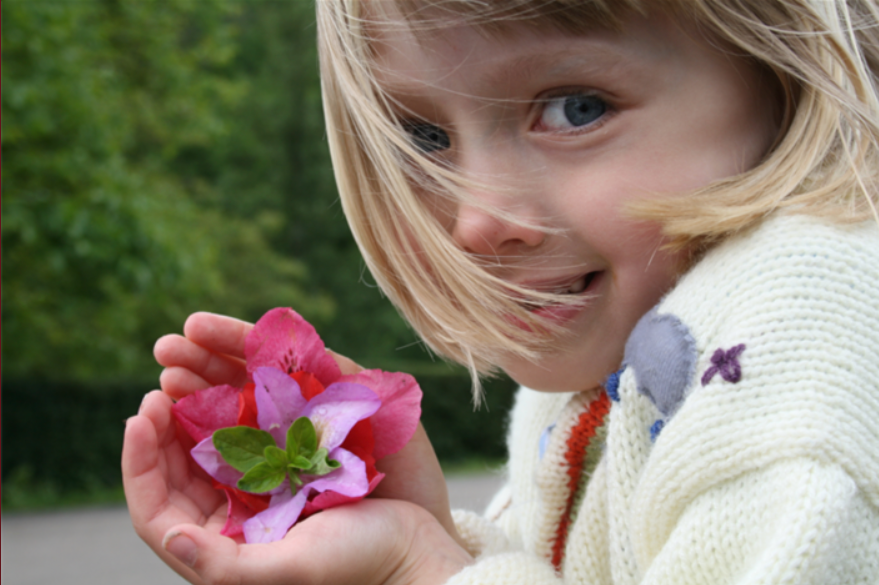

In [ ]:
image = cv2.imread("/content/img1.png", cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image)

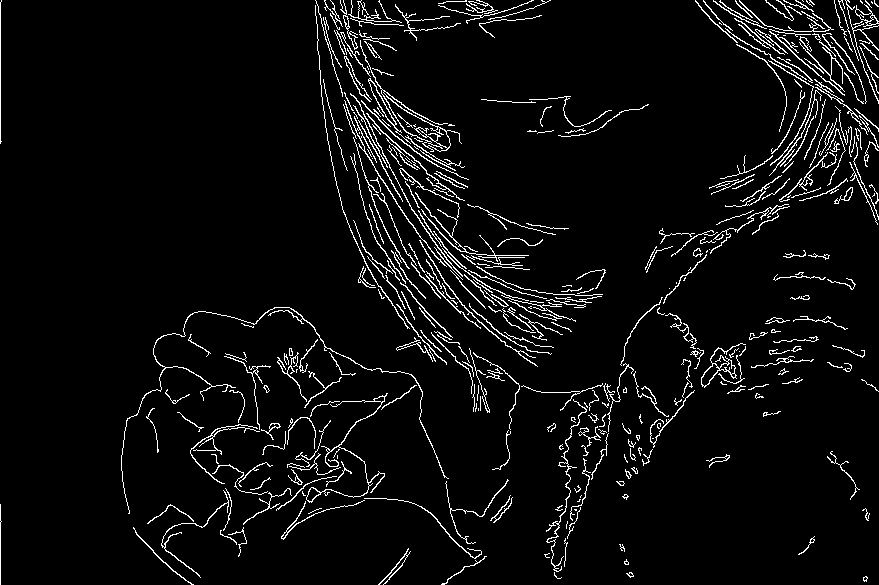

In [ ]:
edges = cv2.Canny(gray, 50, 150)
cv2_imshow(edges)

In [ ]:
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=200, minLineLength=150, maxLineGap=30)
image_lines = image.copy()

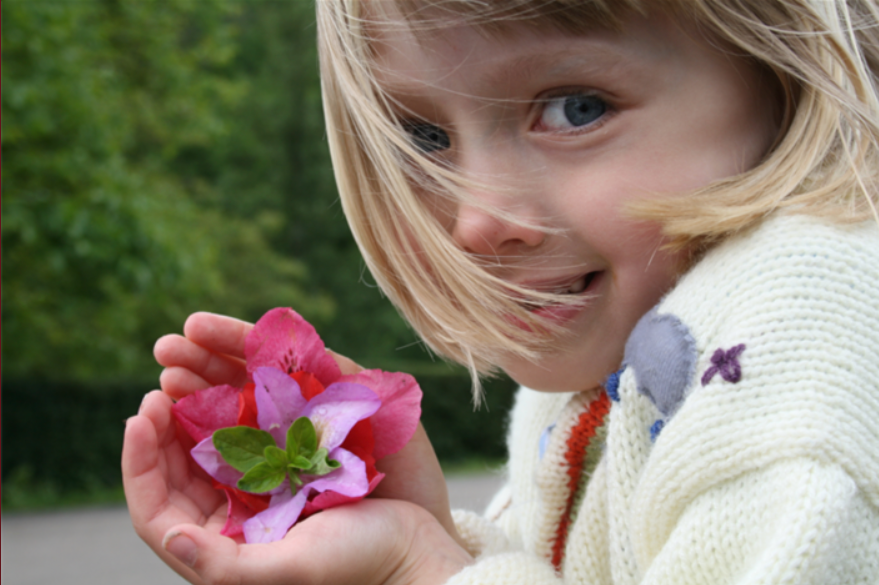

In [ ]:
if lines is not None:
  for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)
cv2_imshow(image_lines)

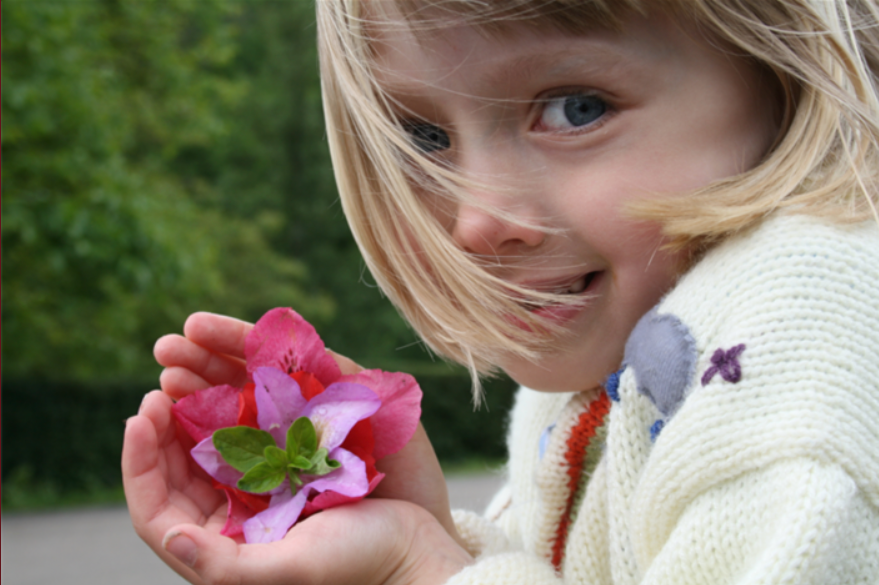

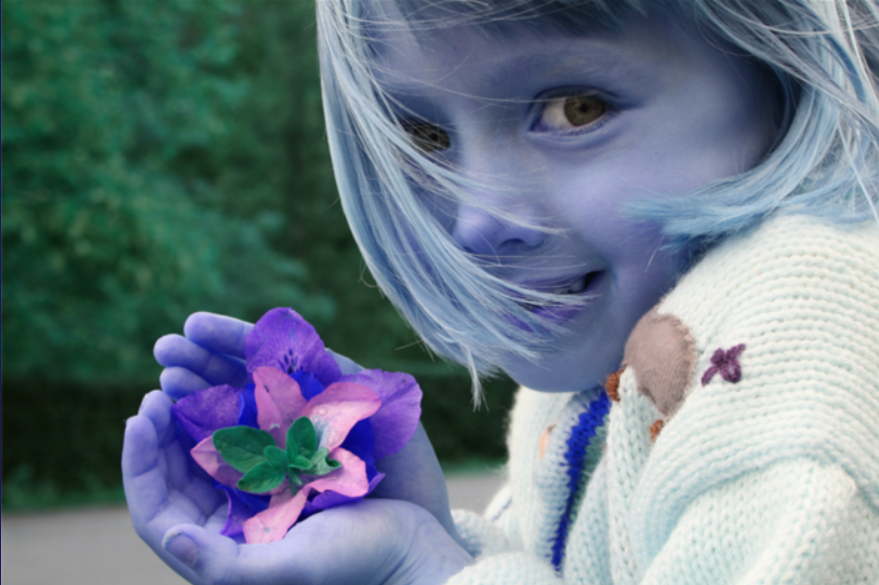

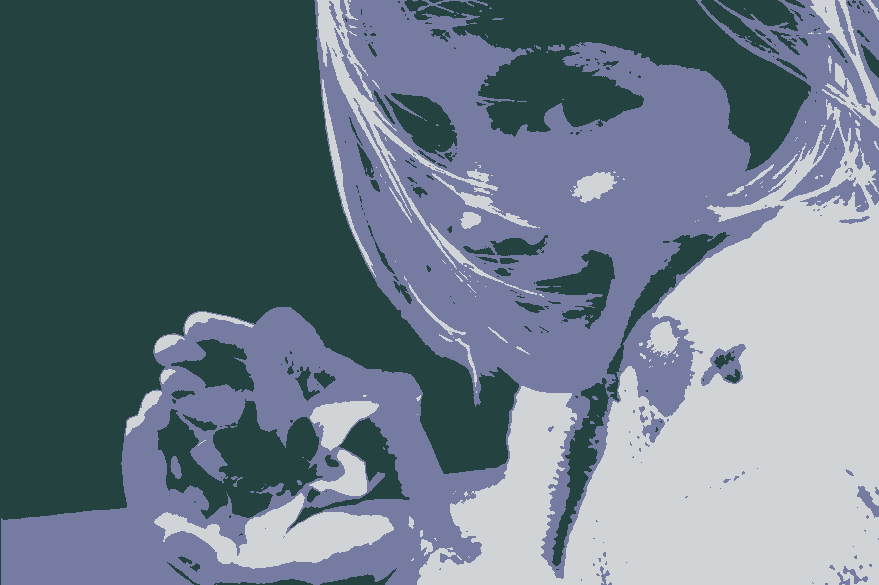

In [ ]:
image = cv2.imread("/content/img1.png")
cv2_imshow(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2_imshow(image)

pixels = image.reshape((-1, 3)).astype(np.float32)

K = 3
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
_, labels, centers = cv2.kmeans(pixels, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

segmented = centers[labels.flatten()].reshape(image.shape)
segmented = np.uint8(segmented)

cv2_imshow(segmented)

In [ ]:
image = cv2.imread("/content/img2.png", cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

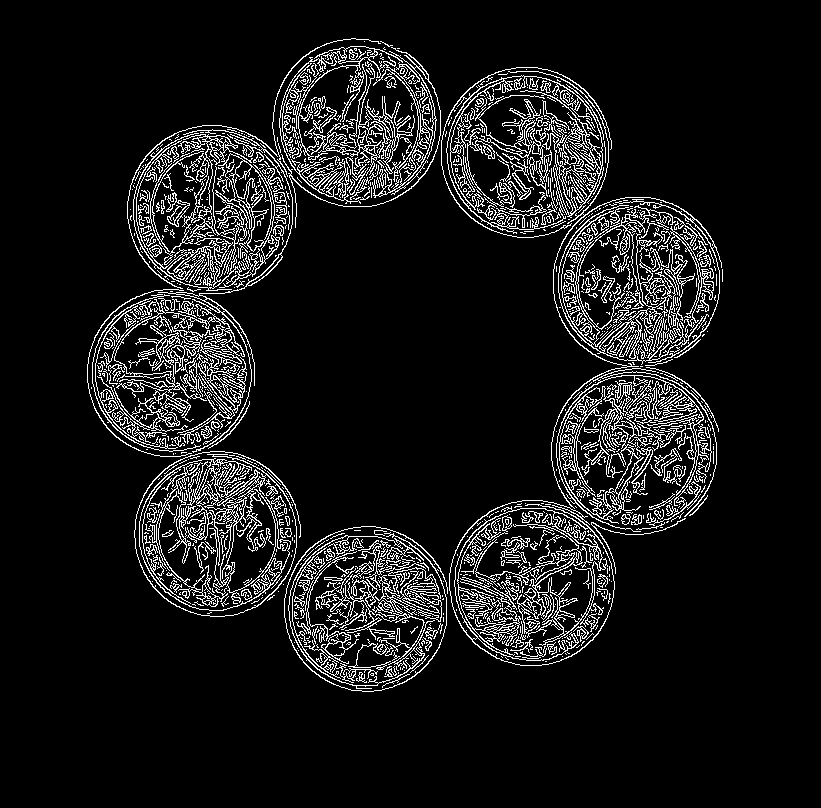

In [ ]:
edges = cv2.Canny(gray, 50, 150)
cv2_imshow(edges)

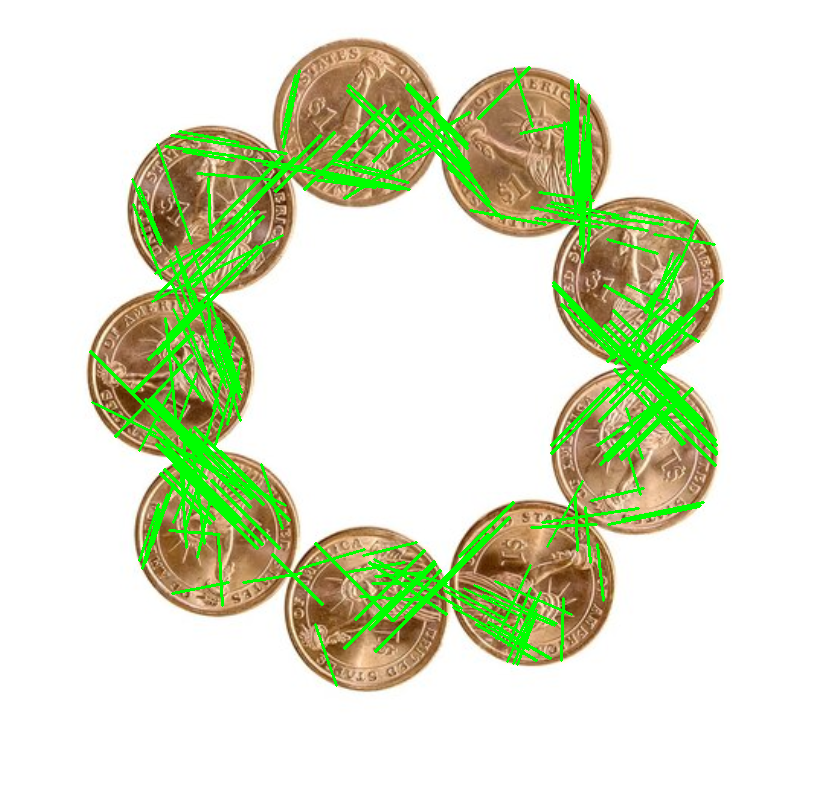

In [ ]:
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=5)
image_lines = image.copy()

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)

cv2_imshow(image_lines)

In [ ]:
circles = cv2.HoughCircles(
    gray,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=100,
    param1=150,
    param2=100,
    minRadius=30,
    maxRadius=100
)

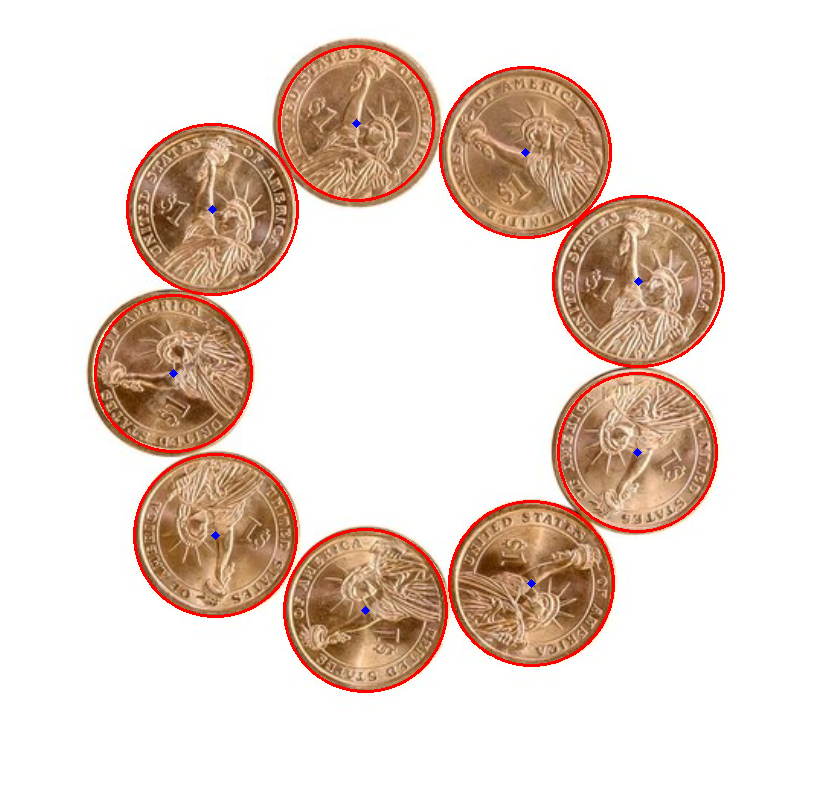

In [ ]:
image_circles = image.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(image_circles, (i[0], i[1]), i[2], (0, 0, 255), 2)
        cv2.circle(image_circles, (i[0], i[1]), 2, (255, 0, 0), 3)

cv2_imshow(image_circles)

TASK **2**

In [ ]:
# pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
!pip install opencv-python torch torchvision torchaudio numpy matplotlib

import cv2
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from ultralytics import YOLO

WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.11/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 618.1ms
image 2/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/zidane.jpg: 384x640 2 persons, 1 tie, 123.5ms
Speed: 11.4ms preprocess, 370.8ms inference, 23.3ms postprocess per image at shape (1, 3, 384, 640)


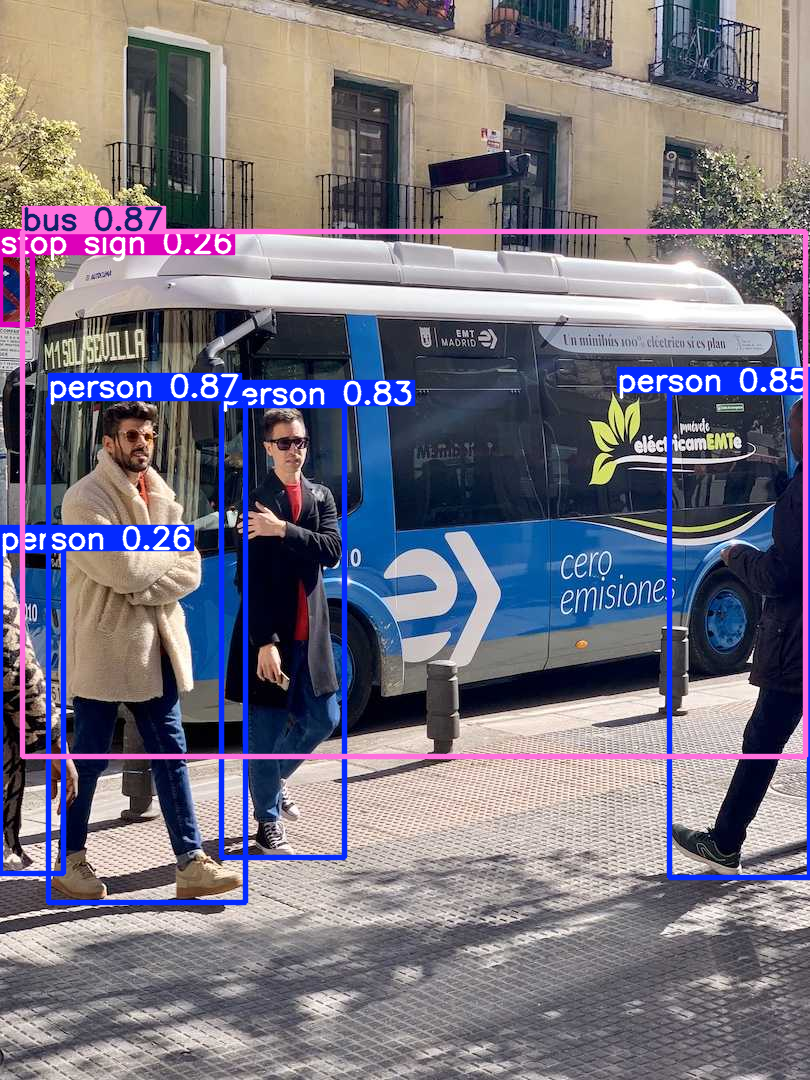

In [ ]:
def yolo_object_detection():
    model = YOLO("yolov8n.pt")

    image_path = "https://ultralytics.com/images/zidane.jpg"  # Example image
    image = cv2.imread(image_path)

    # Run YOLO
    results = model(image)

    results[0].show()


# YOLO detection
yolo_object_detection()

Files already downloaded and verified


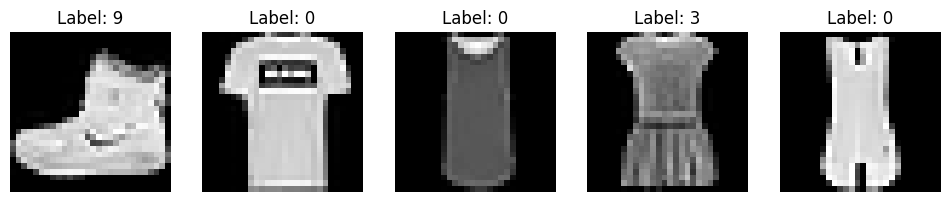

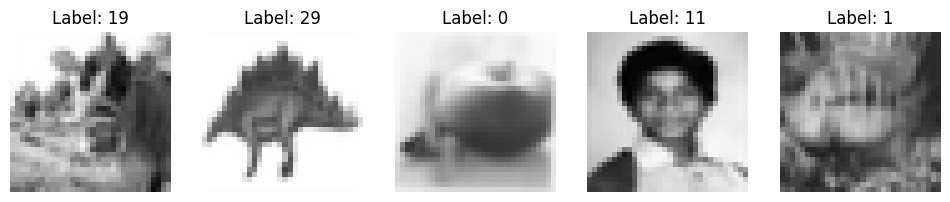

[{'boxes': tensor([], size=(0, 4)), 'labels': tensor([], dtype=torch.int64), 'scores': tensor([])}]


In [ ]:
# datasets (Fashion MNIST and CIFAR-100)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor()
])

fashion_mnist = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
cifar100 = datasets.CIFAR100(root="./data", train=True, download=True, transform=transform)

#  sample images
def show_images(dataset, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(12, 3))
    for i in range(num_images):
        image, label = dataset[i]
        image_np = image.permute(1, 2, 0).numpy() if image.shape[0] == 3 else image.squeeze().numpy()
        axes[i].imshow(image_np, cmap='gray' if image.shape[0] == 1 else None)
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')
    plt.show()

show_images(fashion_mnist)
show_images(cifar100)

# pre-trained  R-CNN model
model_rcnn = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=None)
model_rcnn.eval()

def detect_objects_rcnn(image):
    image_tensor = image.unsqueeze(0)
    with torch.no_grad():
        prediction = model_rcnn(image_tensor)

    return prediction

# sample image from CIFAR-100
sample_image, _ = cifar100[1]
predictions = detect_objects_rcnn(sample_image)
print(predictions)

Epoch 1, Loss: 0.4096, Accuracy: 85.17%
Epoch 2, Loss: 0.2587, Accuracy: 90.30%


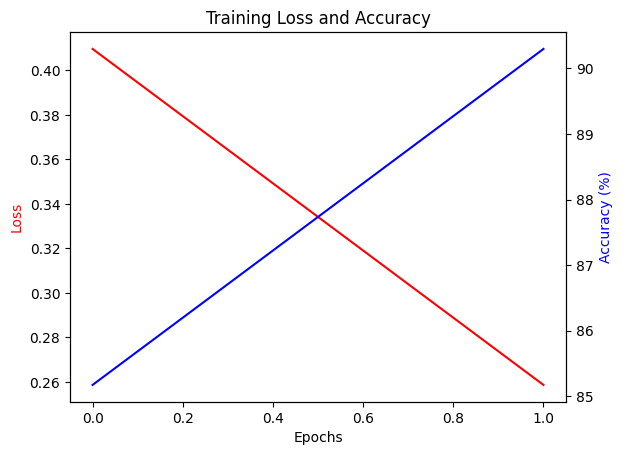

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()

        # output size after convolution and pooling
        self.flattened_size = 64 * 14 * 14  # (28x28 -> MaxPool(2) -> 14x14)

        self.fc1 = nn.Linear(self.flattened_size, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(self.relu(self.conv2(x)))
        x = torch.flatten(x, start_dim=1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# Training function
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    train_loss = []
    train_acc = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 * correct / total
        train_loss.append(epoch_loss)
        train_acc.append(epoch_acc)
        print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

    return train_loss, train_acc

# data loaders
train_loader = torch.utils.data.DataLoader(fashion_mnist, batch_size=128, shuffle=True)

# model, loss, and optimizer
model = SimpleCNN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train model
loss_values, acc_values = train_model(model, train_loader, criterion, optimizer, num_epochs=2)

# accuracy and loss
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(loss_values, 'r-', label='Loss')
ax2.plot(acc_values, 'b-', label='Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='r')
ax2.set_ylabel('Accuracy (%)', color='b')
plt.title('Training Loss and Accuracy')
plt.show()